<h1 style = 'color:green'>Credit Card Fraud Detection Detection(Supervised Learning)</h1>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [10]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

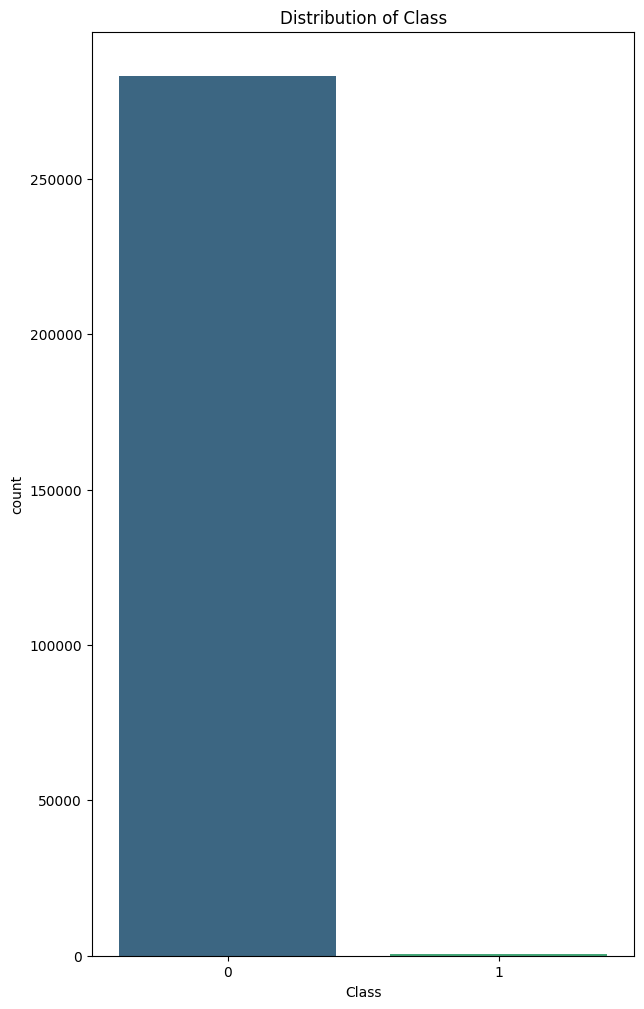

In [11]:
plt.figure(figsize=(7, 12))
sns.countplot(data=df, x='Class', palette='viridis', hue='Class', legend=False)
plt.title("Distribution of Class")
plt.show()

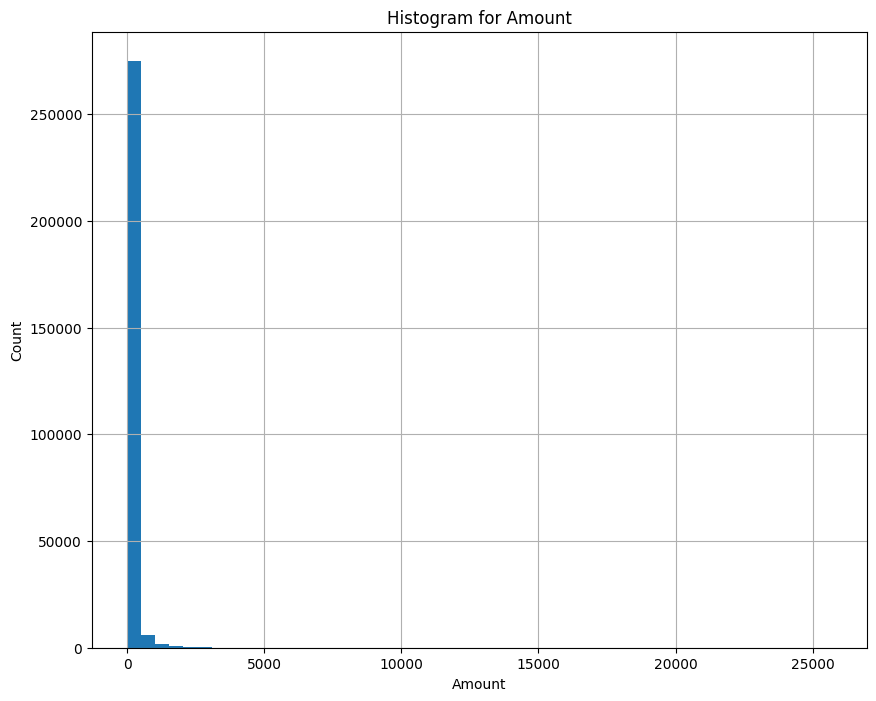

In [12]:
plt.figure(figsize=(10, 8))
df['Amount'].hist(bins=50)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Histogram for Amount')
plt.show()

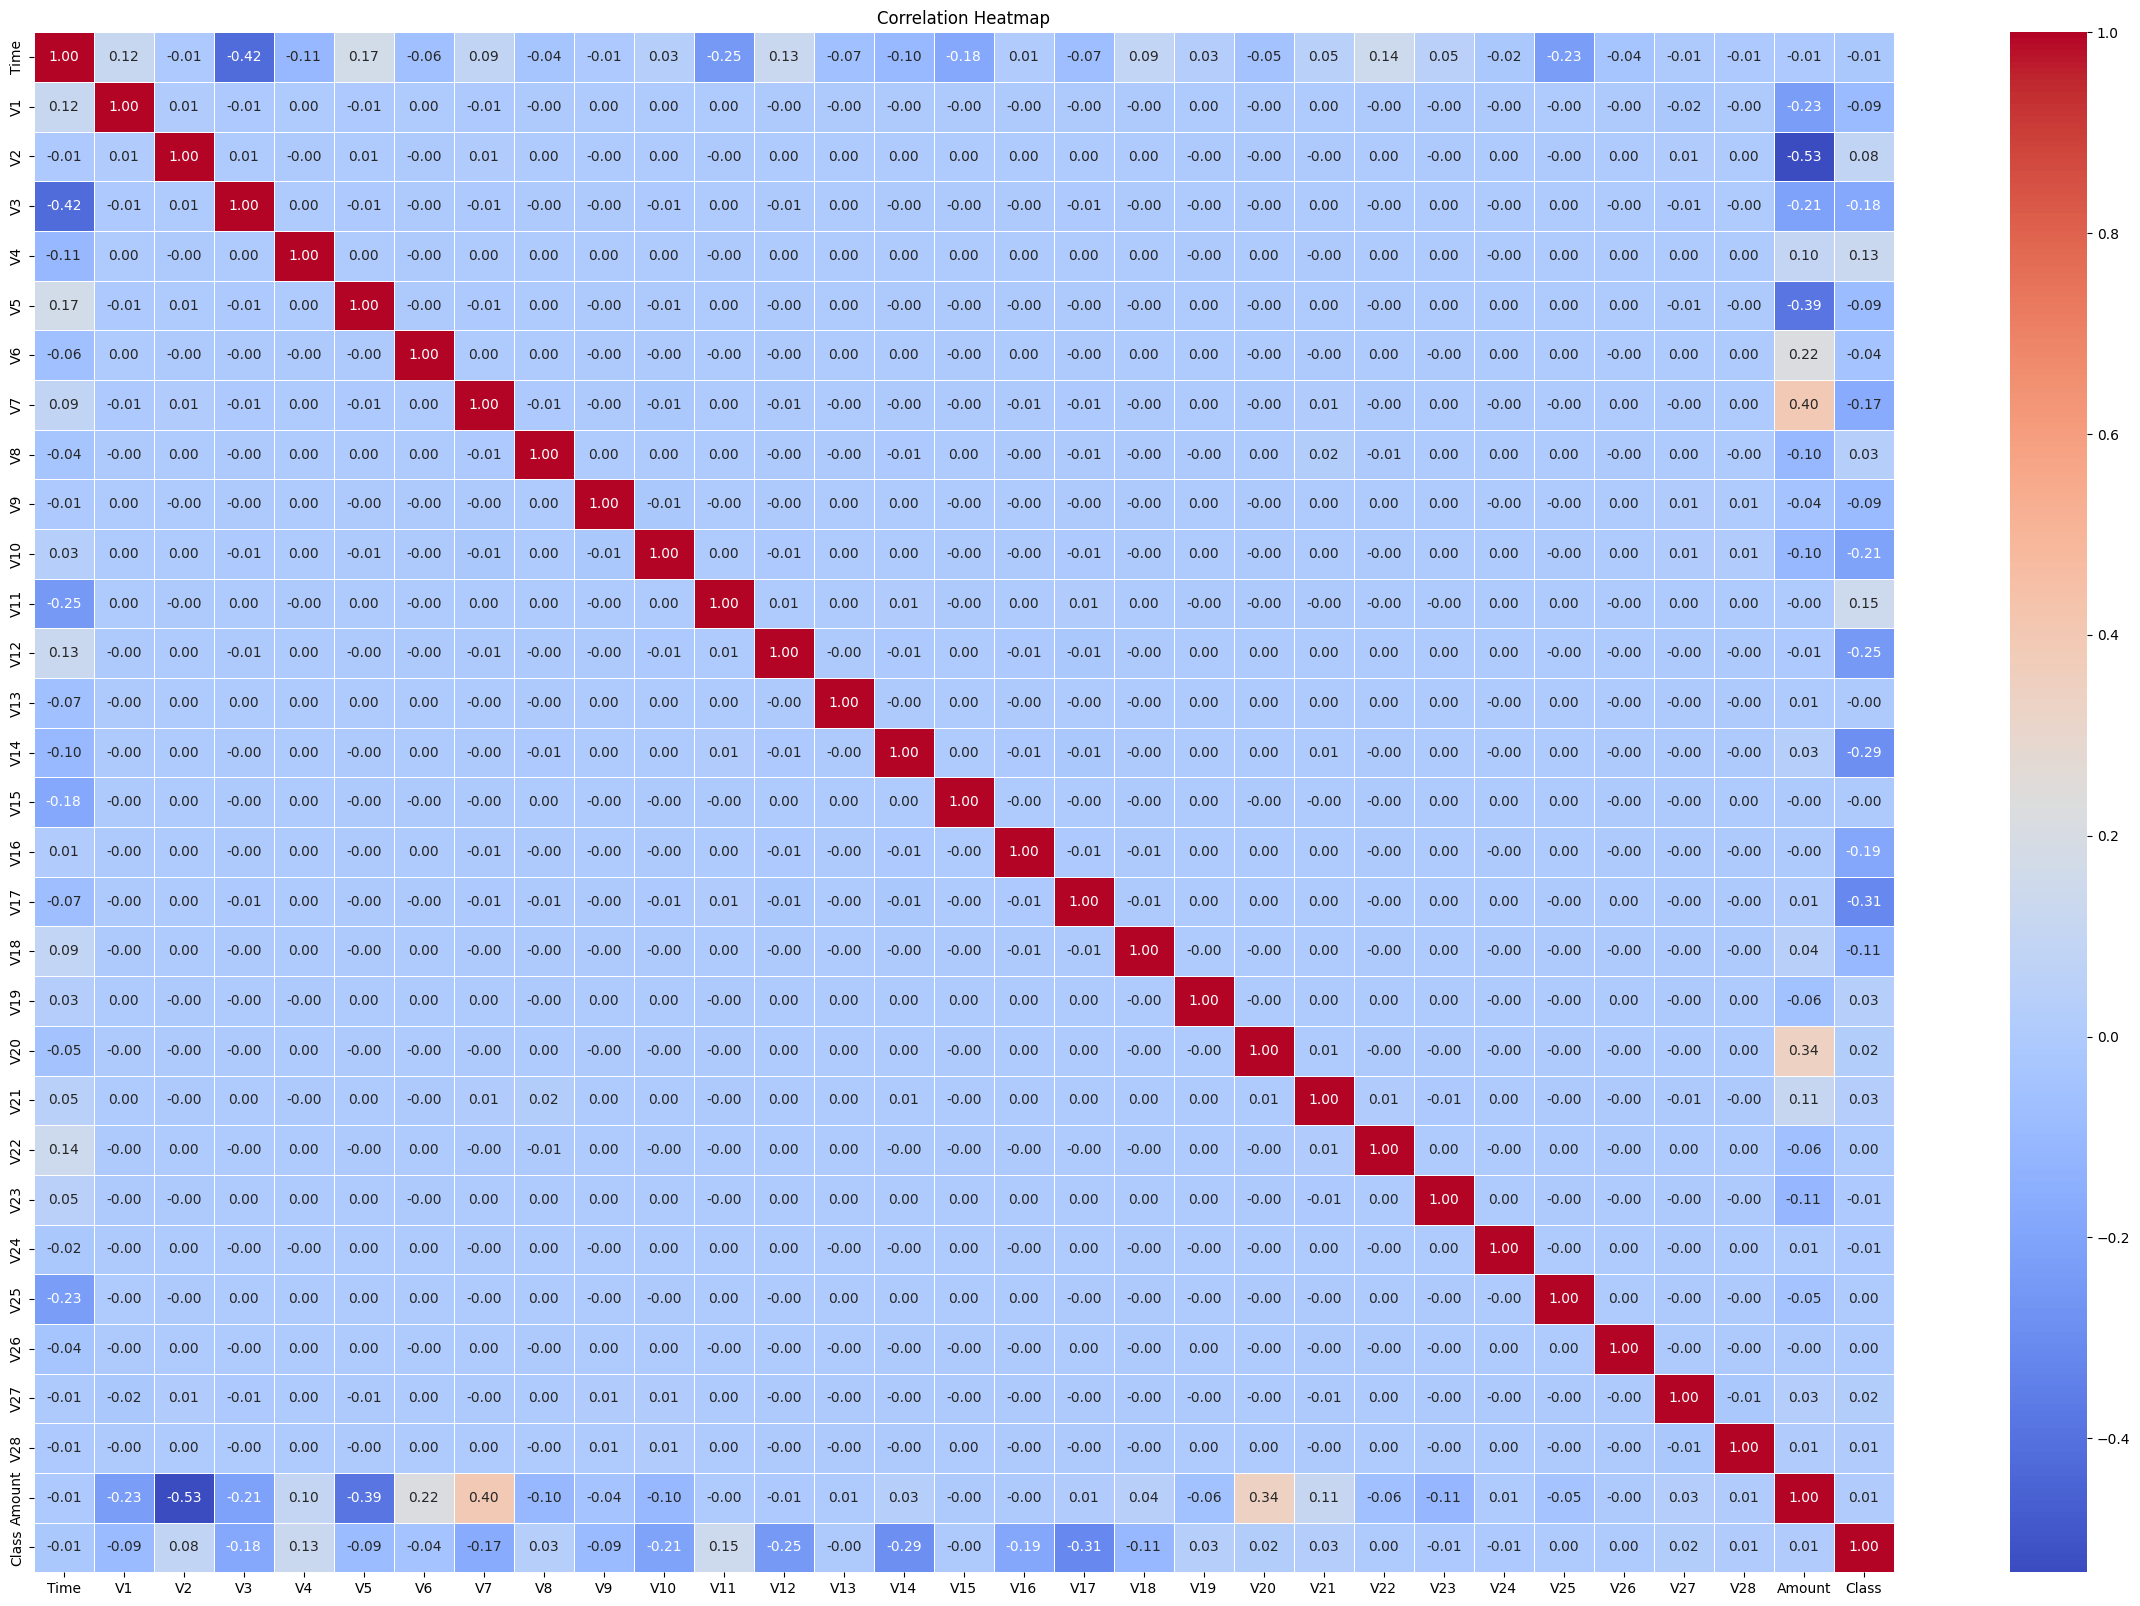

In [13]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
len(df.columns)

31

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [16]:
df['scaled_amount'] = scalar.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scalar.fit_transform(df['Time'].values.reshape(-1, 1))

In [17]:
df = df.drop(['Amount', 'Time'], axis=1)

In [18]:
df.columns.tolist()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class',
 'scaled_amount',
 'scaled_time']

In [19]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [22]:
x_train.shape, y_train.shape

((226980, 30), (226980,))

In [23]:
x_test.shape, y_test.shape

((56746, 30), (56746,))

In [24]:
pd.Series(y).value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

<h2 style='color:green'>Model Building</h2>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [27]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
lr.score(x_train_sm, y_train_sm)*100, lr.score(x_test, y_test)*100

(94.78005489801502, 97.37250202657457)

In [29]:
y_pred_lr = lr.predict(x_test)

In [30]:
classification_report(y_test, y_pred_lr)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99     56651\n           1       0.05      0.87      0.10        95\n\n    accuracy                           0.97     56746\n   macro avg       0.53      0.92      0.54     56746\nweighted avg       1.00      0.97      0.99     56746\n'

In [31]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[55172,  1479],
       [   12,    83]])

In [32]:
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

np.float64(0.9618504434817429)

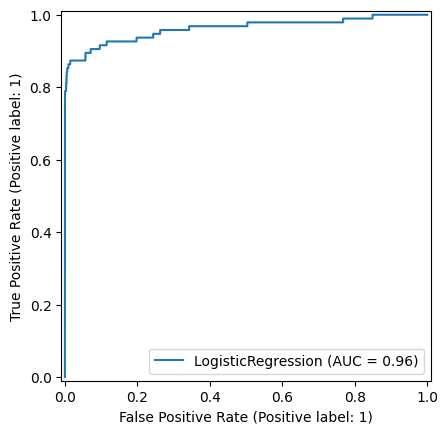

In [59]:
## ROC Cureve 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, x_test, y_test)
plt.show()

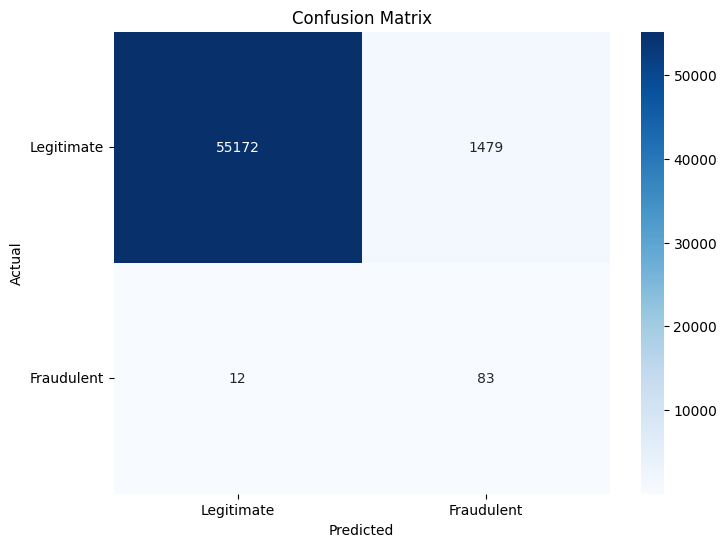

In [33]:
## plot Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [36]:
rf.score(x_train_sm, y_train_sm)*100, rf.score(x_test, y_test)*100

(100.0, 99.94889507630494)

In [37]:
y_pred_rf = rf.predict(x_test)

In [38]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56651\n           1       0.92      0.76      0.83        95\n\n    accuracy                           1.00     56746\n   macro avg       0.96      0.88      0.92     56746\nweighted avg       1.00      1.00      1.00     56746\n'

In [39]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[56645,     6],
       [   23,    72]])

In [40]:
roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

np.float64(0.943603448259844)

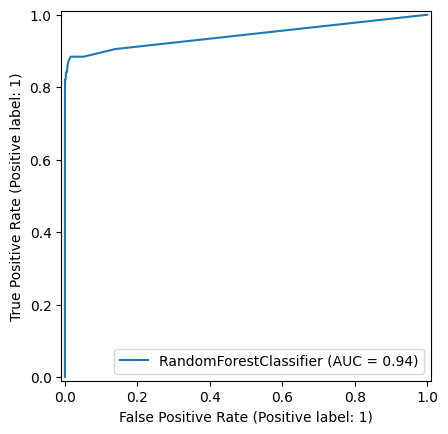

In [52]:
## ROC Cureve 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, x_test, y_test)
plt.show()

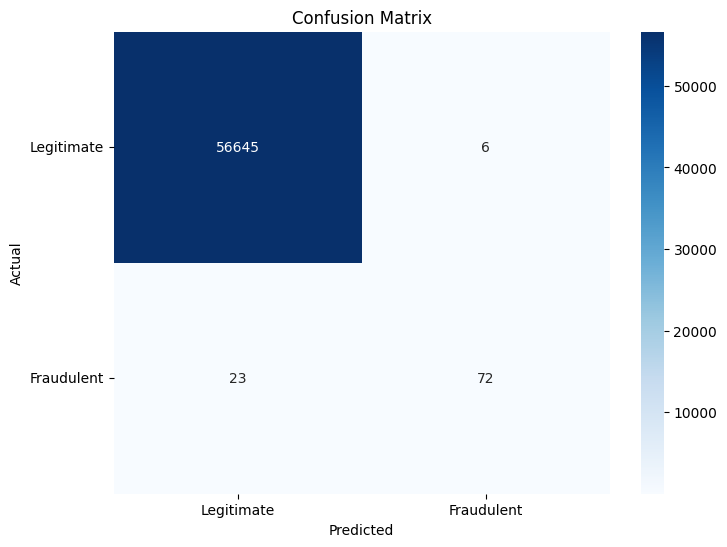

In [41]:
## plot Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot= True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train_sm, y_train_sm)

/home/sabin/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [05:02:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
xgb.score(x_train_sm, y_train_sm)*100, xgb.score(x_test, y_test)*100

(100.0, 99.92069925633524)

In [45]:
y_pred_xgb = xgb.predict(x_test)

In [46]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[56626,    25],
       [   20,    75]])

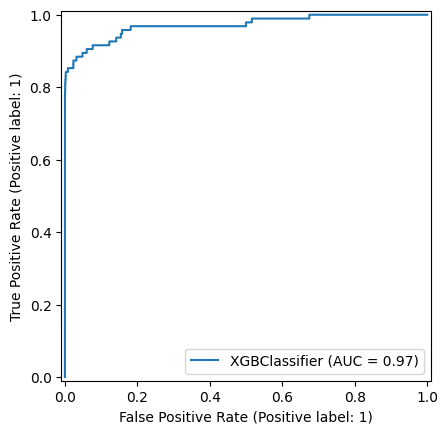

In [60]:
## ROC Cureve 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb, x_test, y_test)
plt.show()

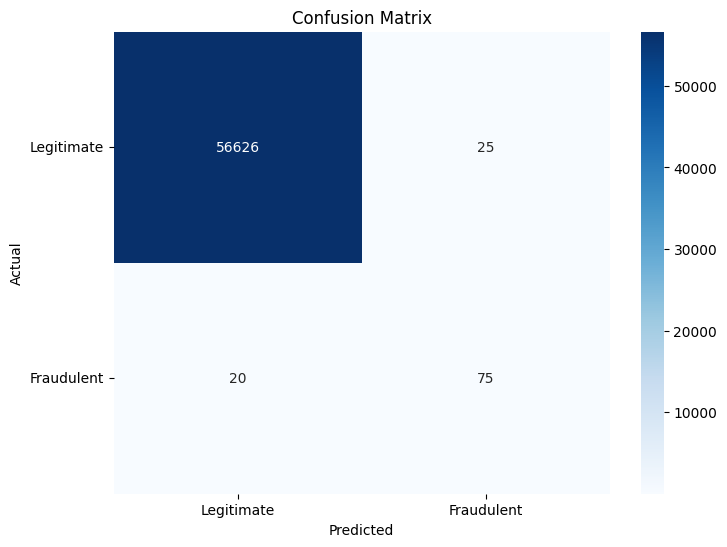

In [47]:
## plot Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot= True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance using RandomForest

In [48]:
importances = rf.feature_importances_

In [49]:
features = X.columns

In [50]:
indices = np.argsort(importances)[::-1]

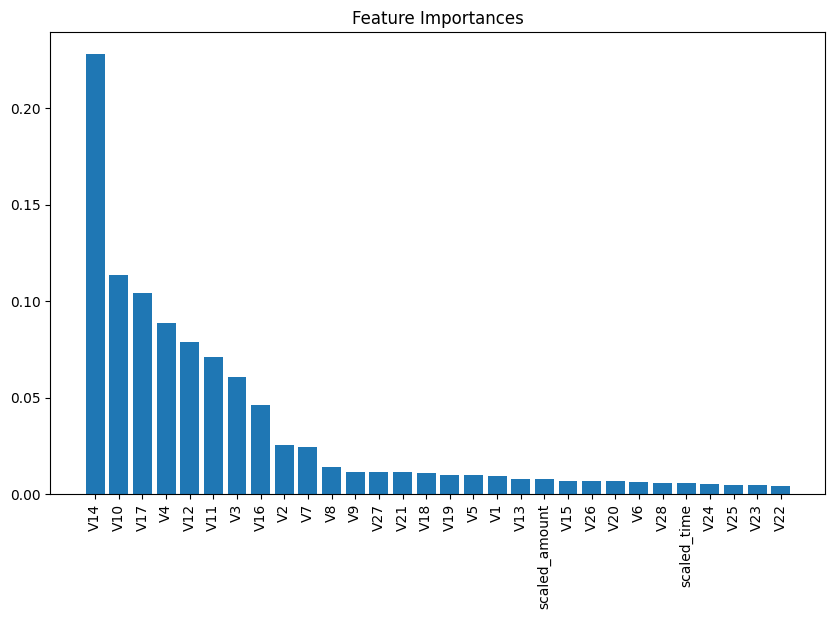

In [51]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

## Hyperparameter Tuning

In [53]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [100, 200], 
#     'max_depth':[None, 10, 20], 
#     'min_samples_split': [2, 5],
#     'min_samples_leaf':[1, 4]
# }

In [54]:
# grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, scoring='recall', cv=5)
# grid.fit(x_train_sm, y_train_sm)

In [55]:
# grid.best_params_

In [56]:
# best_model = grid.best_estimator_

In [57]:
# y_pred = best_model.predict(x_test)

<h2 style = 'color:green'>Save the Model </h2>

In [58]:
import joblib 

joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [61]:
model = joblib.load('random_forest_model.joblib')

In [69]:
new_data = x_test.iloc[0].values.reshape(1, -1)

In [70]:
new_data

array([[ 1.22882115, -0.06340772,  0.27414514,  0.64746502, -0.04813456,
         0.37207303, -0.22423059,  0.07993905,  0.64075882, -0.2730537 ,
        -1.25272794,  0.46507877,  0.40050212, -0.29284186, -0.10177402,
        -0.3998359 ,  0.03433566, -0.78355025,  0.1413449 , -0.0965659 ,
        -0.12955445, -0.08377933, -0.15166147, -0.7003716 ,  0.59855016,
         0.49140907,  0.00298926,  0.00178229, -0.30740014, -0.70598982]])

In [71]:
prediction = model.predict(new_data)

/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
print("Fraud" if prediction[0] == 1 else "Not Fraud")

Not Fraud


In [76]:
print('Fraud' if y_test.iloc[0] == 1 else "Not Fraud")

Not Fraud
